In [2]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 16.4 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.7 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/10.7 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/10.7 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/10.7 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/10.7 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/10.7 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/10.7 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/10.7 MB 1.5 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/10.7 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/10.7 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/10.7 MB 1.5 MB/s eta 0:00:05
   --

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Fill missing age values with the median
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# Check if there are still any missing values
titanic["age"].isnull().sum()



np.int64(0)

In [8]:
# Fill missing embarked values with mode
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])


In [9]:
# Convert categorical columns into numerical using one-hot encoding
titanic_encoded = pd.get_dummies(titanic, columns=["sex", "embarked", "pclass"], drop_first=True)
titanic_encoded.head()


,survived,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True,False,True
1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False,False,False
2,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True,False,True
3,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True,False,False
4,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True,False,True


In [13]:
# Optional: Drop columns that are not useful for prediction
titanic = titanic.drop(columns=["who", "adult_male", "deck", "embark_town", "alive", "class", "alone"], errors='ignore')

# Fill missing values
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic["fare"] = titanic["fare"].fillna(titanic["fare"].median())
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])

# Convert categorical columns to numeric
titanic_encoded = pd.get_dummies(titanic, columns=["sex", "embarked", "pclass"], drop_first=True)

# Define features and label
X = titanic_encoded.drop("survived", axis=1)
y = titanic_encoded["survived"]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [15]:
# Predict on the test set
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [17]:
from sklearn.metrics import classification_report

# Detailed performance report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



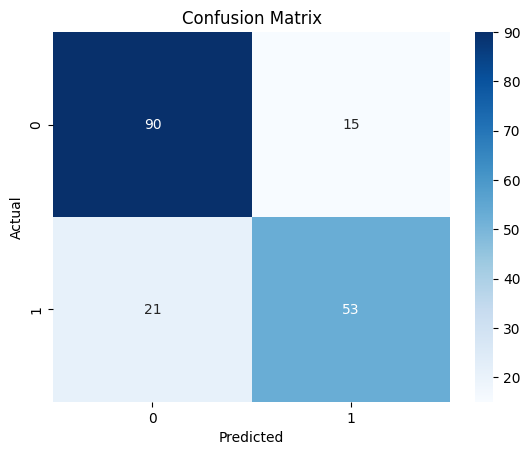

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


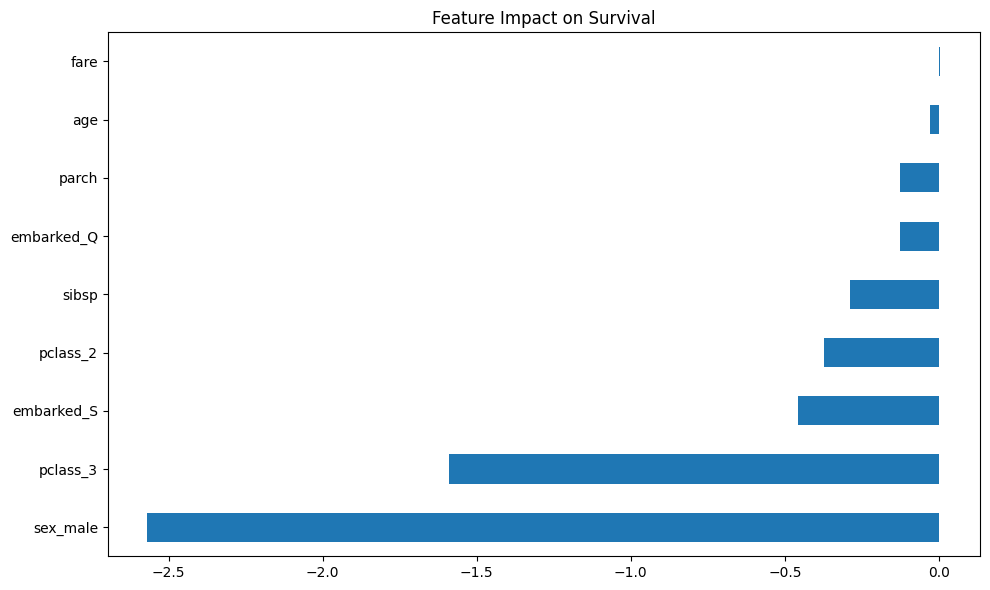

In [19]:
# Show feature importance
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Impact on Survival")
plt.tight_layout()
plt.show()
